In [14]:
import scipy as sci
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math as m
import sympy as sp
from sympy import symbols
from sympy import sympify
from sympy import *
import random
import pandas as pd

In [52]:
# Forward Kinematics Funtion
def FK2R (l1,l2,q1,q2):
    x= l1* np.sin(q1) + l2* np.cos(q2)
    y= l1* np.cos(q1) + l2* np.sin(q2)
    return x,y

#From Repository
def IK2R(x, y, l1, l2, elbow):  # elbow parameter = 1 or -1 for elbow down and up configurations
    D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
    if elbow == 1:
        D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    if elbow == -1:
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    return q1, q2


In [15]:
from google.colab import files
uploaded = files.upload()

Saving Gait_DATA.xlsx to Gait_DATA (2).xlsx


In [17]:
import io
df= pd.read_excel(io.BytesIO(uploaded['Gait_DATA.xlsx']))
df

,X (cm),Y (cm)
0,46.108625,12.809129
1,45.628312,12.786217
2,45.105438,12.732817
3,44.568188,12.646511
4,44.005938,12.526861
...,...,...
256,49.286187,9.933923
257,49.174875,10.148979
258,49.047063,10.359342
259,48.911938,10.559667


(-27.501015625, 27.521328125000004, -75.64045646875, -20.618112718749998)

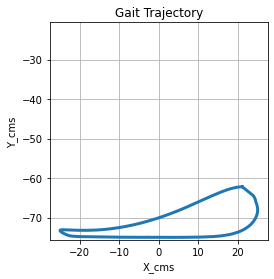

In [27]:
X = np.array(df['X (cm)'])-25
Y = np.array(df['Y (cm)'])-75
plt.figure()
plt.plot(X,Y,linewidth=3)
plt.xlabel('X_cms')
plt.ylabel('Y_cms')
plt.grid()
plt.title('Gait Trajectory')
plt.axis('square')

Part c: Finding Joint variable of each joint of planar 2R Robot and confirming it with backsubstituting to Forward Kinematics equation. 


Here we are shifting the trajectory in negative Y-Direction as the robot will be in origin (such that it replicates human leg motion). 

In [53]:
# Applying Inverse Kinematics
l1=40
l2=50
n = len(X)
q1=[0]*n
q2=[0]*n
for i in range(n):
  q1_temp, q2_temp = IK2R(X[i],Y[i],l1,l2,1)
  q1[i] = q1_temp
  q2[i] = q2_temp

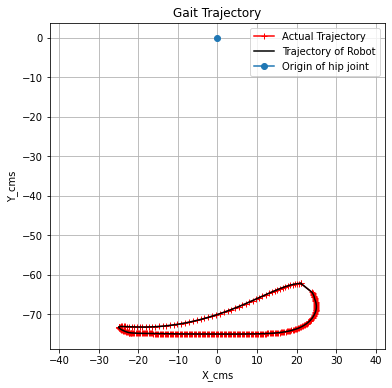

In [66]:
#Checking the joint variables generated by putting it back in Forward kinematics and plotting it. 
X1= [0]*n
Y1= [0]*n
for i in range(n):
  X_temp, Y_temp = FK2R(l1,l2,q1[i],q2[i])
  X1[i] = X_temp
  Y1[i] = Y_temp

plt.figure(figsize=(6,6))
plt.plot(X,Y,'-r+',X1,Y1,'-k',0,0,'-o')
plt.xlabel('X_cms')
plt.ylabel('Y_cms')
plt.grid()
plt.title('Gait Trajectory')
plt.axis('equal')
plt.legend(['Actual Trajectory','Trajectory of Robot','Origin of hip joint'])